<a href="https://colab.research.google.com/github/rwtsgr/project1/blob/main/Deep_learning_prjct(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rawatsagar","key":"94dcfd5d3d156264cf24cc61120380eb"}'}

In [6]:

import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"
 

In [7]:
!kaggle datasets download -d ash2703/handsignimages

 22% 5.00M/23.1M [00:00<00:00, 33.9MB/s]
100% 23.1M/23.1M [00:00<00:00, 115MB/s] 


In [8]:
zip_ref = zipfile.ZipFile('handsignimages.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [9]:

len(os.listdir('/content/Test/A'))


331

In [10]:
import numpy as np # linear algebra

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import string
import os

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    '/content/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'training'
    )

validation_generator = train_datagen.flow_from_directory(
    '/content/Train',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale',
    subset = 'validation'
    )

test_generator = test_datagen.flow_from_directory(
    '/content/Test',
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "sparse",
    color_mode='grayscale'
    )

Found 21974 images belonging to 24 classes.
Found 5481 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [14]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

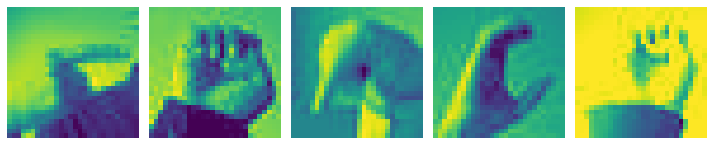

In [16]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

In [17]:
import tensorflow as tf

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(24, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [19]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("loss") < 0.004:
            print("\nReached 99.6% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

In [20]:
from tensorflow.keras.optimizers import RMSprop


In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer = RMSprop(lr = 0.001),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
history = model.fit(
    train_generator,
    epochs=10,
    callbacks = [callback],
    validation_data = validation_generator
)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
172/172 [==============================] - 53s 305ms/step - loss: 2.0002 - accuracy: 0.3907 - val_loss: 0.7688 - val_accuracy: 0.7612
Epoch 2/10
172/172 [==============================] - 51s 299ms/step - loss: 0.5610 - accuracy: 0.8095 - val_loss: 0.1658 - val_accuracy: 0.9611
Epoch 3/10
172/172 [==============================] - 51s 298ms/step - loss: 0.2476 - accuracy: 0.9162 - val_loss: 0.0655 - val_accuracy: 0.9854
Epoch 4/10
172/172 [==============================] - 51s 298ms/step - loss: 0.1303 - accuracy: 0.9564 - val_loss: 0.0325 - val_accuracy: 0.9967
Epoch 5/10
172/172 [==============================] - 51s 297ms/step - loss: 0.0887 - accuracy: 0.9702 - val_loss: 0.0166 - val_accuracy: 0.9956
Epoch 6/10
172/172 [==============================] - 52s 300ms/step - loss: 0.0548 - accuracy: 0.9821 - val_loss: 0.0078 - val_accuracy: 0.9998
Epoch 7/10
172/172 [==============================] - 51s 299ms/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.0064 - val_ac

In [22]:
results = model.evaluate(test_generator)

57/57 [==============================] - 5s 80ms/step - loss: 0.1303 - accuracy: 0.9611


In [23]:
# PLOT LOSS AND ACCURACY

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and validation loss')

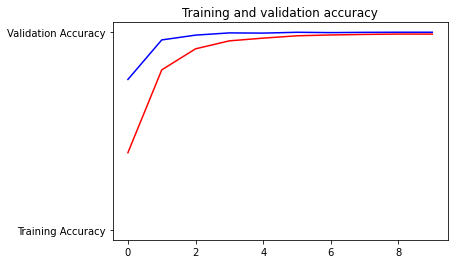

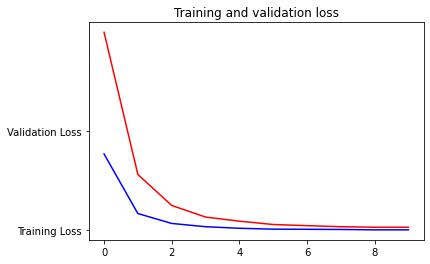

In [24]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics.

In [25]:
from random import randint
import cv2 as cv

def testModel(alphabet = "A"):
    dirname, _, filenames = list(os.walk(f'/content/Test{alphabet.upper()}'))[0]
    img_path = os.path.join(dirname, filenames[randint(0, len(filenames))])
    print(img_path)
    img = cv.imread(img_path, 0).reshape(1, 28, 28, 1)
    pred = model.predict(img)
    pred_label = classes[np.argmax(pred)]

    plt.title(pred_label)
    plt.imshow(img[0,:,:,0], cmap = "gray")

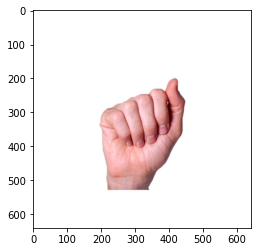

In [26]:
import requests
from PIL import Image
url = 'https://challengepost-s3-challengepost.netdna-ssl.com/photos/production/software_photos/001/028/905/datas/original.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [27]:
from skimage import io
from google.colab.patches import cv_imshow

In [28]:
img = cv.cvtColor(np.float32(img),cv.COLOR_RGB2GRAY)

In [29]:
img_path=url
print(img_path)


https://challengepost-s3-challengepost.netdna-ssl.com/photos/production/software_photos/001/028/905/datas/original.jpg


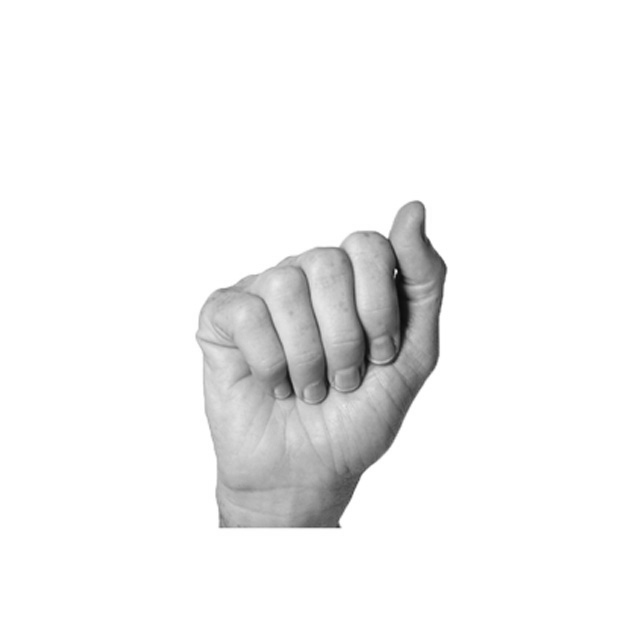

In [30]:
cv_imshow(img)


In [31]:
img.shape

(640, 640)

In [32]:
df=sample_training_images[0]
df.shape

(28, 28, 1)

In [33]:
img = np.asarray(img)
img = cv.resize(img, (28, 28))

In [34]:
img = img.reshape(1,28,28,1)
img.shape

(1, 28, 28, 1)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0


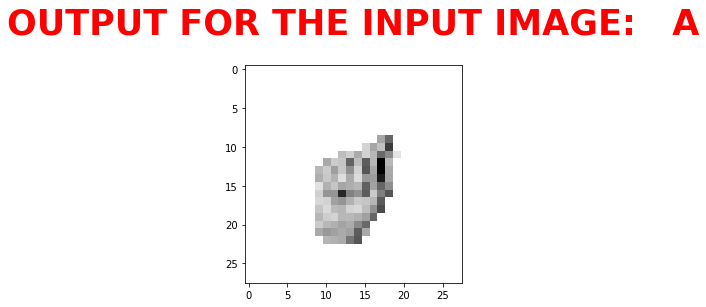

In [35]:
pred = model.predict(img)
print(pred)
print(np.argmin(pred))
pred_label = classes[np.argmin(pred)]

plt.title("OUTPUT FOR THE INPUT IMAGE:   {}".format(pred_label),fontsize=35,color='r',fontweight='bold',y=1.12)
plt.imshow(img[0,:,:,0], cmap = "gray")